In [4]:
import requests
import pandas as pd

response = requests.get(
    "https://api.dexscreener.com/token-boosts/latest/v1",
    headers={"Accept": "*/*"},
)

data = response.json()

# If data is a list, use it directly
if isinstance(data, list):
    tokens = data
elif isinstance(data, dict):
    tokens = data.get("pairs", []) or data.get("data", [])
else:
    tokens = []

# Filter for Solana chain (chainId == "solana")
solana_tokens = [t for t in tokens if t.get("chainId", "").lower() == "solana"]

# Convert to DataFrame
df = pd.DataFrame(solana_tokens)
print(df.head())

                                                 url chainId  \
0  https://dexscreener.com/solana/9fnicn6btdvxph6...  solana   
1  https://dexscreener.com/solana/5xykkfajpamsh4t...  solana   
2  https://dexscreener.com/solana/8ah7rq8qywkjomc...  solana   
3  https://dexscreener.com/solana/fwzxfg6whcaajd5...  solana   
4  https://dexscreener.com/solana/74esrkpotxr8vji...  solana   

                                   tokenAddress  \
0  9FNiCN6bTdVXph6hkKtS7hUCWFV2APdAN8Qq5J66pump   
1  5XyKkFaJpAmsH4Tf2EFj3S61W3hC5cJhxNZQQ5h1pump   
2  8ah7rq8qyWkJoMCq4cnELUvMSJtWCxSQEkQ4wMz6pump   
3  FwZxfG6WHcAAJD5ShYZZQNQCNgtrw2oniQhoDXR5pump   
4  74eSRkPotxr8VjiZYKFnoYr9JDVEycWkrzHhFpuKmoon   

                                           openGraph  totalAmount  amount  \
0  https://cdn.dexscreener.com/token-images/og/so...           10      10   
1  https://cdn.dexscreener.com/token-images/og/so...           50      50   
2  https://cdn.dexscreener.com/token-images/og/so...           10      10   


In [5]:
import requests
import os
from dotenv import load_dotenv
import pandas as pd
from joblib import dump

# Load .env
load_dotenv()
Birdeye_Api_key = os.getenv("Birdeye_Api_key")

url = "https://public-api.birdeye.so/defi/v2/tokens/new_listing"

headers = {
    "accept": "application/json",
    "x-chain": "solana",
    "x-api-key": Birdeye_Api_key
}

all_tokens = []
batch_size = 20
max_records = 100

for offset in range(0, max_records, batch_size):
    params = {
        "limit": batch_size,
        "offset": offset,
        "meme_platform_enabled": "false"
    }
    response = requests.get(url, headers=headers, params=params)
    data = response.json()
    
    tokens = data.get("data", {}).get("items", [])
    if not tokens:
        print(f"⚠️ No items at offset {offset}, stopping early.")
        break
    all_tokens.extend(tokens)

# Convert to pandas DataFrame
df = pd.DataFrame(all_tokens)

print(f"✅ Total tokens fetched: {len(df)}")
print("\nDataFrame Preview:")
print(df.head())

# Save to joblib
if not df.empty:
    dump(df, "birdeye_new_listings.pkl")
    print("\n💾 Data saved to birdeye_new_listings.pkl")
else:
    print("\n⚠️ No tokens fetched, nothing saved.")


✅ Total tokens fetched: 100

DataFrame Preview:
                                        address   symbol  \
0  8NbWuBse1SPJAsuD1VQUoaHu5xoLiwM2ji5qgUZ8M2Ci     ELON   
1  FsQqbusjzeh77CYtDczMokpJaorDAUt5gnfpguqEpump  JOBLESS   
2  14McwtpS9NfGuSjRnfkV9WUToH51Woniv73v2chefNJ9    BABOT   
3  2CqETZ6M2mnHB6eBHJsasMDqah9f2QNjdxPCcrd3gUK8  LILPEPE   
4  BhKdTpXmDaWq76DAhtLUuhicFjvEJw83ku6Yn3pe9SRm  MILLION   

                         name  decimals                         source  \
0                        ELON         9                       fluxbeam   
1    quit my job live on pump         6                       pump_amm   
2                   BuidlABot         6                       fluxbeam   
3                  LittlePepe         6  meteora_dynamic_bonding_curve   
4  COUNTING TO A MILLION LIVE         6  meteora_dynamic_bonding_curve   

      liquidityAddedAt                                            logoURI  \
0  2025-09-16T13:07:28                                               

In [6]:

import os
from dotenv import load_dotenv
import requests
import pandas as pd
import joblib

# Load .env
load_dotenv()
API_KEY = os.getenv("MORALIS_API_KEY")

if not API_KEY:
    raise ValueError("MORALIS_API_KEY not found in .env")

url = "https://solana-gateway.moralis.io/token/mainnet/4zLj7pCr1kQSRPNReQAqbpwvtEdKrkwj2peHYTyB92sS/top-holders"
params = {"limit": 100}

headers = {
    "Accept": "application/json",
    "X-API-Key": API_KEY
}

response = requests.get(url, headers=headers, params=params)

print("HTTP", response.status_code)

if response.status_code == 200:
    data = response.json()
    holders = data.get("result", [])  # Moralis usually puts the list in "result"

    # Convert to DataFrame
    df = pd.DataFrame(holders)

    # Save with joblib
    joblib.dump(df, "top_holders.pkl")

    print("✅ Data saved to top_holders.pkl")
    print(df.head())
else:
    print(response.text)


HTTP 200
✅ Data saved to top_holders.pkl
           balance  balanceFormatted  isContract  \
0  333329074937467  333329074.937467       False   
1   35588943335866   35588943.335866       False   
2   28616153119458   28616153.119458       False   
3   27114114391121   27114114.391121       False   
4   23937674750336   23937674.750336       False   

                                   ownerAddress              usdValue  \
0  Cn7fEU6Q8rGqQSEBVyPX2XGofvMdbWAsNn2TuUo3oiSS  13189.83149527556919   
1  6B57ti9t1Zyc4gcoARyTFsyf653iGxoq6HXxE9H2BbNj   1408.25448780021762   
2  ASum8km5VNmnHcjR4ygWisfFdo4dZjbekjGP2Rdep2uw   1132.34117893695306   
3  2PBRmZuPxeLAAmyHLCLQgikB5HGP1Y7mLzg6KpNNVJ16   1072.90550645665797   
4  54TjXEPpA873V8Bw4RtLW1WiEo7p2nMPRmAj3JmCDpWg    947.21378987079552   

   percentageRelativeToTotalSupply  
0                            33.33  
1                             3.56  
2                             2.86  
3                             2.71  
4                     

In [9]:
# %%
import requests
import os
from dotenv import load_dotenv
import pandas as pd
from joblib import dump
import time

# -------------------------------
# Load API keys
# -------------------------------
load_dotenv()
Birdeye_Api_key = os.getenv("Birdeye_Api_key")
Moralis_Api_key = os.getenv("MORALIS_API_KEY")

if not Birdeye_Api_key:
    raise ValueError("Birdeye API key not found in .env")
if not Moralis_Api_key:
    raise ValueError("Moralis API key not found in .env")

# -------------------------------
# Dexscreener API (latest boosts)
# -------------------------------
dex_url = "https://api.dexscreener.com/token-boosts/latest/v1"
dex_resp = requests.get(dex_url, headers={"Accept": "*/*"})
dex_data = dex_resp.json()

if isinstance(dex_data, list):
    dex_tokens = dex_data
elif isinstance(dex_data, dict):
    dex_tokens = dex_data.get("pairs", []) or dex_data.get("data", [])
else:
    dex_tokens = []

# Filter Solana
dex_tokens = [t for t in dex_tokens if t.get("chainId", "").lower() == "solana"]
dex_df = pd.DataFrame(dex_tokens)
print(f"✅ Dexscreener tokens: {len(dex_df)}")

# -------------------------------
# Birdeye API (new listings)
# -------------------------------
birdeye_url = "https://public-api.birdeye.so/defi/v2/tokens/new_listing"
headers = {
    "accept": "application/json",
    "x-chain": "solana",
    "x-api-key": Birdeye_Api_key
}

all_tokens = []
batch_size = 20
max_records = 100

for offset in range(0, max_records, batch_size):
    params = {"limit": batch_size, "offset": offset, "meme_platform_enabled": "false"}
    resp = requests.get(birdeye_url, headers=headers, params=params)
    data = resp.json()
    tokens = data.get("data", {}).get("items", [])
    if not tokens:
        break
    all_tokens.extend(tokens)

birdeye_df = pd.DataFrame(all_tokens)
print(f"✅ Birdeye tokens: {len(birdeye_df)}")

# -------------------------------
# Join Dexscreener + Birdeye
# -------------------------------
if not dex_df.empty and not birdeye_df.empty:
    # unify address columns
    dex_df = dex_df.rename(columns={"baseToken": "dex_baseToken"})
    birdeye_df = birdeye_df.rename(columns={"address": "tokenAddress"})

    # extract baseToken.address in Dexscreener
    if "dex_baseToken" in dex_df.columns:
        dex_df["tokenAddress"] = dex_df["dex_baseToken"].apply(
            lambda x: x.get("address") if isinstance(x, dict) else None
        )

    combined_df = pd.merge(
        birdeye_df, dex_df,
        on="tokenAddress",
        how="outer",   # 👈 use OUTER JOIN instead of INNER
        suffixes=("_birdeye", "_dexscreener")
    )
else:
    combined_df = pd.DataFrame()

print(f"✅ Combined tokens: {len(combined_df)}")

# -------------------------------
# Fetch holders dynamically from Moralis
# -------------------------------
holders_list = []
if not combined_df.empty:
    for addr in combined_df["tokenAddress"].dropna().unique():
        url = f"https://solana-gateway.moralis.io/token/mainnet/{addr}/top-holders"
        params = {"limit": 1}  # we just need to know how many holders exist
        headers = {"Accept": "application/json", "X-API-Key": Moralis_Api_key}
        resp = requests.get(url, headers=headers, params=params)

        if resp.status_code == 200:
            data = resp.json()
            total_holders = data.get("total", None) or len(data.get("result", []))
        else:
            total_holders = None

        holders_list.append({"tokenAddress": addr, "total_holders": total_holders})

        time.sleep(0.2)  # rate-limit safety

    holders_df = pd.DataFrame(holders_list)
    combined_df = combined_df.merge(holders_df, on="tokenAddress", how="left")

# -------------------------------
# Save final DataFrame
# -------------------------------
if not combined_df.empty:
    dump(combined_df, "combined_tokens.pkl")
    print("💾 Final combined data saved to combined_tokens.pkl")
    print(combined_df.head())
else:
    print("⚠️ No combined data found")


✅ Dexscreener tokens: 28
✅ Birdeye tokens: 100
✅ Combined tokens: 128
💾 Final combined data saved to combined_tokens.pkl
                                   tokenAddress    symbol  \
0   1SwEzzQamit1izWwEJ8uNmEShHfukjxwVmVamkkN777  CRUSH IT   
1  29K2pNbSKDUuRxy7YQyw83KBiCg4B2KqCk258rDpmoon  WORTRICA   
2  29K2pNbSKDUuRxy7YQyw83KBiCg4B2KqCk258rDpmoon  WORTRICA   
3  29K2pNbSKDUuRxy7YQyw83KBiCg4B2KqCk258rDpmoon  WORTRICA   
4  29K2pNbSKDUuRxy7YQyw83KBiCg4B2KqCk258rDpmoon  WORTRICA   

                            name  decimals                         source  \
0  I Will Crush My Diamond Award       6.0                       pump_amm   
1                   Worth Murica       6.0  meteora_dynamic_bonding_curve   
2                   Worth Murica       6.0  meteora_dynamic_bonding_curve   
3                   Worth Murica       6.0  meteora_dynamic_bonding_curve   
4                   Worth Murica       6.0  meteora_dynamic_bonding_curve   

      liquidityAddedAt                           

In [11]:
import joblib

df = joblib.load("combined_tokens.pkl")
print(df.head())

                                   tokenAddress    symbol  \
0   1SwEzzQamit1izWwEJ8uNmEShHfukjxwVmVamkkN777  CRUSH IT   
1  29K2pNbSKDUuRxy7YQyw83KBiCg4B2KqCk258rDpmoon  WORTRICA   
2  29K2pNbSKDUuRxy7YQyw83KBiCg4B2KqCk258rDpmoon  WORTRICA   
3  29K2pNbSKDUuRxy7YQyw83KBiCg4B2KqCk258rDpmoon  WORTRICA   
4  29K2pNbSKDUuRxy7YQyw83KBiCg4B2KqCk258rDpmoon  WORTRICA   

                            name  decimals                         source  \
0  I Will Crush My Diamond Award       6.0                       pump_amm   
1                   Worth Murica       6.0  meteora_dynamic_bonding_curve   
2                   Worth Murica       6.0  meteora_dynamic_bonding_curve   
3                   Worth Murica       6.0  meteora_dynamic_bonding_curve   
4                   Worth Murica       6.0  meteora_dynamic_bonding_curve   

      liquidityAddedAt                                            logoURI  \
0  2025-09-16T13:42:19  https://ipfs.io/ipfs/QmWmGBkbRUGPn4gUhKvLqRWFs...   
1  2025-09-16T13

✅ Final Combined Tokens (unique by contract address):
                                tokenAddress    symbol                          name  decimals                        source    liquidityAddedAt                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
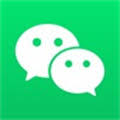
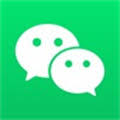

In [12]:
# ---------------------------------------
# Clean + reshape combined data
# ---------------------------------------
if not combined_df.empty:
    # Drop duplicates by tokenAddress (keeping the first non-null info)
    combined_df = (
        combined_df
        .sort_values(by=["liquidity"], ascending=False)   # keep higher-liquidity first
        .drop_duplicates(subset=["tokenAddress"], keep="first")
    )

    # Select only relevant columns (merge from both APIs)
    columns_to_keep = [
        "tokenAddress", "symbol", "name", "decimals", "source",
        "liquidityAddedAt", "logoURI", "liquidity",
        "chainId", "url", "description",
        "total_holders"
    ]
    combined_df = combined_df.reindex(columns=columns_to_keep)

    print("✅ Final Combined Tokens (unique by contract address):")
    print(combined_df.head(20).to_string(index=False))  # show 20 rows neatly
else:
    print("⚠️ No combined data available.")
